In [58]:
import pandas as pd
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# show all columns
pd.set_option('display.max_columns', None)

In [60]:
demand_df = pd.read_parquet("../data/raw/333623-10.parquet").reset_index(drop=True)
demand_df

,timestamp,out.district_cooling.cooling.energy_consumption,out.district_heating.heating.energy_consumption,out.district_heating.water_systems.energy_consumption,out.electricity.cooling.energy_consumption,out.electricity.exterior_lighting.energy_consumption,out.electricity.fans.energy_consumption,out.electricity.heat_recovery.energy_consumption,out.electricity.heat_rejection.energy_consumption,out.electricity.heating.energy_consumption,out.electricity.interior_equipment.energy_consumption,out.electricity.interior_lighting.energy_consumption,out.electricity.pumps.energy_consumption,out.electricity.refrigeration.energy_consumption,out.electricity.water_systems.energy_consumption,out.natural_gas.heating.energy_consumption,out.natural_gas.interior_equipment.energy_consumption,out.natural_gas.water_systems.energy_consumption,out.district_cooling.total.energy_consumption,out.district_heating.total.energy_consumption,out.electricity.total.energy_consumption,out.natural_gas.total.energy_consumption,out.other_fuel.cooling.energy_consumption,out.site_energy.total.energy_consumption,out.natural_gas.cooling.energy_consumption,out.other_fuel.interior_equipment.energy_consumption,out.other_fuel.water_systems.energy_consumption,out.other_fuel.total.energy_consumption,out.other_fuel.heating.energy_consumption,out.district_heating.cooling.energy_consumption,out.district_cooling.cooling.energy_consumption_intensity,out.district_heating.heating.energy_consumption_intensity,out.district_heating.water_systems.energy_consumption_intensity,out.electricity.cooling.energy_consumption_intensity,out.electricity.exterior_lighting.energy_consumption_intensity,out.electricity.fans.energy_consumption_intensity,out.electricity.heat_recovery.energy_consumption_intensity,out.electricity.heat_rejection.energy_consumption_intensity,out.electricity.heating.energy_consumption_intensity,out.electricity.interior_equipment.energy_consumption_intensity,out.electricity.interior_lighting.energy_consumption_intensity,out.electricity.pumps.energy_consumption_intensity,out.electricity.refrigeration.energy_consumption_intensity,out.electricity.water_systems.energy_consumption_intensity,out.natural_gas.heating.energy_consumption_intensity,out.natural_gas.interior_equipment.energy_consumption_intensity,out.natural_gas.water_systems.energy_consumption_intensity,out.district_cooling.total.energy_consumption_intensity,out.district_heating.total.energy_consumption_intensity,out.electricity.total.energy_consumption_intensity,out.natural_gas.total.energy_consumption_intensity,out.other_fuel.cooling.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,out.natural_gas.cooling.energy_consumption_intensity,out.other_fuel.interior_equipment.energy_consumption_intensity,out.other_fuel.water_systems.energy_consumption_intensity,out.other_fuel.total.energy_consumption_intensity,out.other_fuel.heating.energy_consumption_intensity,out.district_heating.cooling.energy_consumption_intensity
0,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,0.444784,2.042863,0.0,0.0,6.480583,2.097362,0.593534,1.484821e-10,0.387383,9.589977,0.0,9.311323,0.0,0.0,0.0,21.636486,9.311323,0.0,30.947809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059,0.000272,0.0,0.0,0.000864,0.000280,0.000079,1.979761e-14,0.000052,0.001279,0.0,0.001242,0.0,0.0,0.0,0.002885,0.001242,0.0,0.004126,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,0.444784,2.042863,0.0,0.0,6.492953,1.802582,0.589069,1.457525e-10,0.386823,9.426116,0.0,8.680047,0.0,0.0,0.0,21.185190,8.680047,0.0,29.865237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059,0.000272,0.0,0.0,0.000866,0.000240,0.000079,1.943366e-14,0.000052,0.001257,0.0,0.001157,0.0,0.0,0.0,0.002825,0.001157,0.0,0.003982,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,0.444784,2.042863,0.0,0.0,6.976885,1.213024,0.563644,1.422953e-10,0.386198,9.274258,0.0,7.890952,0.0,0.0,0.0,20.901657,7.890952,0.0,28.792609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059,

In [61]:
demand_df['timestamp'] = pd.to_datetime(demand_df['timestamp'])
demand_df['hour'] = demand_df['timestamp'].dt.hour
demand_df['day_of_week'] = demand_df['timestamp'].dt.dayofweek


demand_df

,timestamp,out.district_cooling.cooling.energy_consumption,out.district_heating.heating.energy_consumption,out.district_heating.water_systems.energy_consumption,out.electricity.cooling.energy_consumption,out.electricity.exterior_lighting.energy_consumption,out.electricity.fans.energy_consumption,out.electricity.heat_recovery.energy_consumption,out.electricity.heat_rejection.energy_consumption,out.electricity.heating.energy_consumption,out.electricity.interior_equipment.energy_consumption,out.electricity.interior_lighting.energy_consumption,out.electricity.pumps.energy_consumption,out.electricity.refrigeration.energy_consumption,out.electricity.water_systems.energy_consumption,out.natural_gas.heating.energy_consumption,out.natural_gas.interior_equipment.energy_consumption,out.natural_gas.water_systems.energy_consumption,out.district_cooling.total.energy_consumption,out.district_heating.total.energy_consumption,out.electricity.total.energy_consumption,out.natural_gas.total.energy_consumption,out.other_fuel.cooling.energy_consumption,out.site_energy.total.energy_consumption,out.natural_gas.cooling.energy_consumption,out.other_fuel.interior_equipment.energy_consumption,out.other_fuel.water_systems.energy_consumption,out.other_fuel.total.energy_consumption,out.other_fuel.heating.energy_consumption,out.district_heating.cooling.energy_consumption,out.district_cooling.cooling.energy_consumption_intensity,out.district_heating.heating.energy_consumption_intensity,out.district_heating.water_systems.energy_consumption_intensity,out.electricity.cooling.energy_consumption_intensity,out.electricity.exterior_lighting.energy_consumption_intensity,out.electricity.fans.energy_consumption_intensity,out.electricity.heat_recovery.energy_consumption_intensity,out.electricity.heat_rejection.energy_consumption_intensity,out.electricity.heating.energy_consumption_intensity,out.electricity.interior_equipment.energy_consumption_intensity,out.electricity.interior_lighting.energy_consumption_intensity,out.electricity.pumps.energy_consumption_intensity,out.electricity.refrigeration.energy_consumption_intensity,out.electricity.water_systems.energy_consumption_intensity,out.natural_gas.heating.energy_consumption_intensity,out.natural_gas.interior_equipment.energy_consumption_intensity,out.natural_gas.water_systems.energy_consumption_intensity,out.district_cooling.total.energy_consumption_intensity,out.district_heating.total.energy_consumption_intensity,out.electricity.total.energy_consumption_intensity,out.natural_gas.total.energy_consumption_intensity,out.other_fuel.cooling.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,out.natural_gas.cooling.energy_consumption_intensity,out.other_fuel.interior_equipment.energy_consumption_intensity,out.other_fuel.water_systems.energy_consumption_intensity,out.other_fuel.total.energy_consumption_intensity,out.other_fuel.heating.energy_consumption_intensity,out.district_heating.cooling.energy_consumption_intensity,hour,day_of_week
0,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,0.444784,2.042863,0.0,0.0,6.480583,2.097362,0.593534,1.484821e-10,0.387383,9.589977,0.0,9.311323,0.0,0.0,0.0,21.636486,9.311323,0.0,30.947809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059,0.000272,0.0,0.0,0.000864,0.000280,0.000079,1.979761e-14,0.000052,0.001279,0.0,0.001242,0.0,0.0,0.0,0.002885,0.001242,0.0,0.004126,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,0.444784,2.042863,0.0,0.0,6.492953,1.802582,0.589069,1.457525e-10,0.386823,9.426116,0.0,8.680047,0.0,0.0,0.0,21.185190,8.680047,0.0,29.865237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059,0.000272,0.0,0.0,0.000866,0.000240,0.000079,1.943366e-14,0.000052,0.001257,0.0,0.001157,0.0,0.0,0.0,0.002825,0.001157,0.0,0.003982,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,0.444784,2.042863,0.0,0.0,6.976885,1.213024,0.563644,1.422953e-10,0.386198,9.274258,0.0,7.890952,0.0,0.0,0.0,20.901657,7.890952,0.0,28.792609,0.0,0.0,0.0,0.0,0.0,0.0,

In [67]:
target = 'out.electricity.total.energy_consumption'

for lag in range(1, 10):
    demand_df[f'demand_lag_{lag}'] = demand_df[target].shift(lag)

features = ['hour', 'day_of_week'] + [f'demand_lag_{lag}' for lag in range(1, 10)] 

filtered_df = demand_df[demand_df[target] > 0]
filtered_df = filtered_df.sort_values('timestamp')
filtered_df = filtered_df.dropna()
filtered_df

,timestamp,out.district_cooling.cooling.energy_consumption,out.district_heating.heating.energy_consumption,out.district_heating.water_systems.energy_consumption,out.electricity.cooling.energy_consumption,out.electricity.exterior_lighting.energy_consumption,out.electricity.fans.energy_consumption,out.electricity.heat_recovery.energy_consumption,out.electricity.heat_rejection.energy_consumption,out.electricity.heating.energy_consumption,out.electricity.interior_equipment.energy_consumption,out.electricity.interior_lighting.energy_consumption,out.electricity.pumps.energy_consumption,out.electricity.refrigeration.energy_consumption,out.electricity.water_systems.energy_consumption,out.natural_gas.heating.energy_consumption,out.natural_gas.interior_equipment.energy_consumption,out.natural_gas.water_systems.energy_consumption,out.district_cooling.total.energy_consumption,out.district_heating.total.energy_consumption,out.electricity.total.energy_consumption,out.natural_gas.total.energy_consumption,out.other_fuel.cooling.energy_consumption,out.site_energy.total.energy_consumption,out.natural_gas.cooling.energy_consumption,out.other_fuel.interior_equipment.energy_consumption,out.other_fuel.water_systems.energy_consumption,out.other_fuel.total.energy_consumption,out.other_fuel.heating.energy_consumption,out.district_heating.cooling.energy_consumption,out.district_cooling.cooling.energy_consumption_intensity,out.district_heating.heating.energy_consumption_intensity,out.district_heating.water_systems.energy_consumption_intensity,out.electricity.cooling.energy_consumption_intensity,out.electricity.exterior_lighting.energy_consumption_intensity,out.electricity.fans.energy_consumption_intensity,out.electricity.heat_recovery.energy_consumption_intensity,out.electricity.heat_rejection.energy_consumption_intensity,out.electricity.heating.energy_consumption_intensity,out.electricity.interior_equipment.energy_consumption_intensity,out.electricity.interior_lighting.energy_consumption_intensity,out.electricity.pumps.energy_consumption_intensity,out.electricity.refrigeration.energy_consumption_intensity,out.electricity.water_systems.energy_consumption_intensity,out.natural_gas.heating.energy_consumption_intensity,out.natural_gas.interior_equipment.energy_consumption_intensity,out.natural_gas.water_systems.energy_consumption_intensity,out.district_cooling.total.energy_consumption_intensity,out.district_heating.total.energy_consumption_intensity,out.electricity.total.energy_consumption_intensity,out.natural_gas.total.energy_consumption_intensity,out.other_fuel.cooling.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,out.natural_gas.cooling.energy_consumption_intensity,out.other_fuel.interior_equipment.energy_consumption_intensity,out.other_fuel.water_systems.energy_consumption_intensity,out.other_fuel.total.energy_consumption_intensity,out.other_fuel.heating.energy_consumption_intensity,out.district_heating.cooling.energy_consumption_intensity,hour,day_of_week,demand_lag_1,demand_lag_2,demand_lag_3,demand_lag_4,demand_lag_5,demand_lag_6,demand_lag_7,demand_lag_8,demand_lag_9
9,2018-01-01 02:30:00,0.0,0.0,0.0,0.0,0.444784,1.030842,0.0,0.0,0.000000,0.145442,0.358337,1.297942e-10,0.350939,7.567165,0.0,2.998562,0.0,0.0,0.0,9.897508,2.998562,0.0,12.896070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059,0.000137,0.0,0.0,0.000000,0.000019,0.000048,1.730590e-14,0.000047,0.001009,0.0,0.000400,0.0,0.0,0.0,0.001320,0.000400,0.0,0.001719,0.0,0.0,0.0,0.0,0.0,0.0,2,0,19.282150,20.425824,19.314767,16.754408,19.243237,20.756455,20.901657,21.185190,21.636486
10,2018-01-01 02:45:00,0.0,0.0,0.0,0.0,0.444784,2.042863,0.0,0.0,8.832176,0.084574,0.302827,1.261062e-10,0.351723,7.386756,0.0,2.461977,0.0,0.0,0.0,19.445703,2.461977,0.0,21.907680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059,0.000272,0.0,0.0,0.001178,0.000011,0.000040,1.681415e-14,0.000047,0.000985,0.0,0.000328,0.0,0.0,0.0,0.002593,0.000328,0.0,0.002921,0.0,0.0,0.0,0.0,0.0,0.0,2

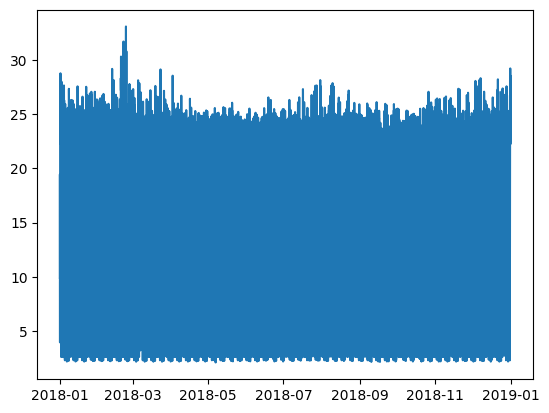

In [68]:
plt.plot(filtered_df['timestamp'], filtered_df[target])

In [69]:
with pm.Model() as model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    betas = pm.Normal('betas', mu=0, sigma=10, shape=len(features))

    # Expected value of outcome (linear model)
    mu = alpha + pm.math.dot(filtered_df[features], betas)

    # Likelihood (sampling distribution) of observations
    sigma = pm.HalfNormal('sigma', sigma=1)
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=filtered_df[target])

    # Posterior distribution
    trace = pm.sample(100, return_inferencedata=False)
    inference_data = pm.to_inference_data(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, betas, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Users/alexanderkell/anaconda3/envs/allye/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 362 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha      1.840  0.051   1.733    1.923      0.003    0.002     369.0   
betas[0]   0.037  0.002   0.033    0.041      0.000    0.000     352.0   
betas[1]  -0.101  0.006  -0.113   -0.090      0.000    0.000     384.0   
betas[2]   0.528  0.005   0.517    0.537      0.000    0.000     200.0   
betas[3]   0.245  0.006   0.233    0.255      0.000    0.000     155.0   
betas[4]   0.051  0.006   0.040    0.064      0.000    0.000     285.0   
betas[5]   0.006  0.006  -0.004    0.018      0.000    0.000     232.0   
betas[6]   0.628  0.005   0.619    0.636      0.000    0.000     309.0   
betas[7]  -0.357  0.006  -0.366   -0.345      0.000    0.000     247.0   
betas[8]  -0.129  0.006  -0.139   -0.116      0.000    0.000     182.0   
betas[9]  -0.062  0.006  -0.074   -0.050      0.000    0.000     247.0   
betas[10] -0.018  0.006  -0.028   -0.007      0.000    0.000     220.0   
sigma      2.338  0.009   2.321    2.3

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

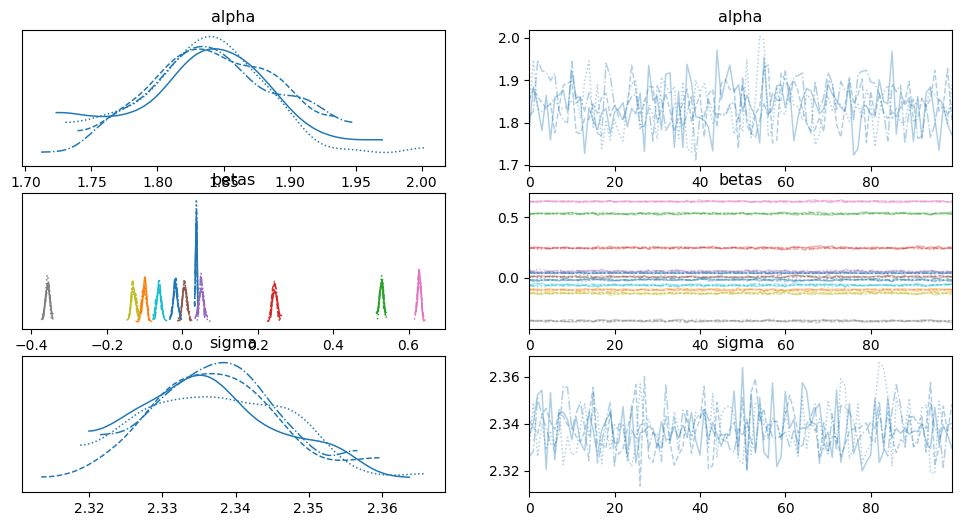

In [70]:
import arviz as az

# Summary of the posterior distribution for model parameters
summary = az.summary(inference_data)
print(summary)

# Plotting the posterior distributions for the coefficients
az.plot_trace(inference_data)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, betas, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Users/alexanderkell/anaconda3/envs/allye/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 3 chains for 500 tune and 410 draw iterations (1_500 + 1_230 draws total) took 310 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'betas\n0'}>,
        <Axes: title={'center': 'betas\n1'}>,
        <Axes: title={'center': 'betas\n2'}>],
       [<Axes: title={'center': 'betas\n3'}>,
        <Axes: title={'center': 'betas\n4'}>,
        <Axes: title={'center': 'betas\n5'}>,
        <Axes: title={'center': 'betas\n6'}>],
       [<Axes: title={'center': 'betas\n7'}>,
        <Axes: title={'center': 'betas\n8'}>,
        <Axes: title={'center': 'betas\n9'}>,
        <Axes: title={'center': 'betas\n10'}>],
       [<Axes: title={'center': 'sigma'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

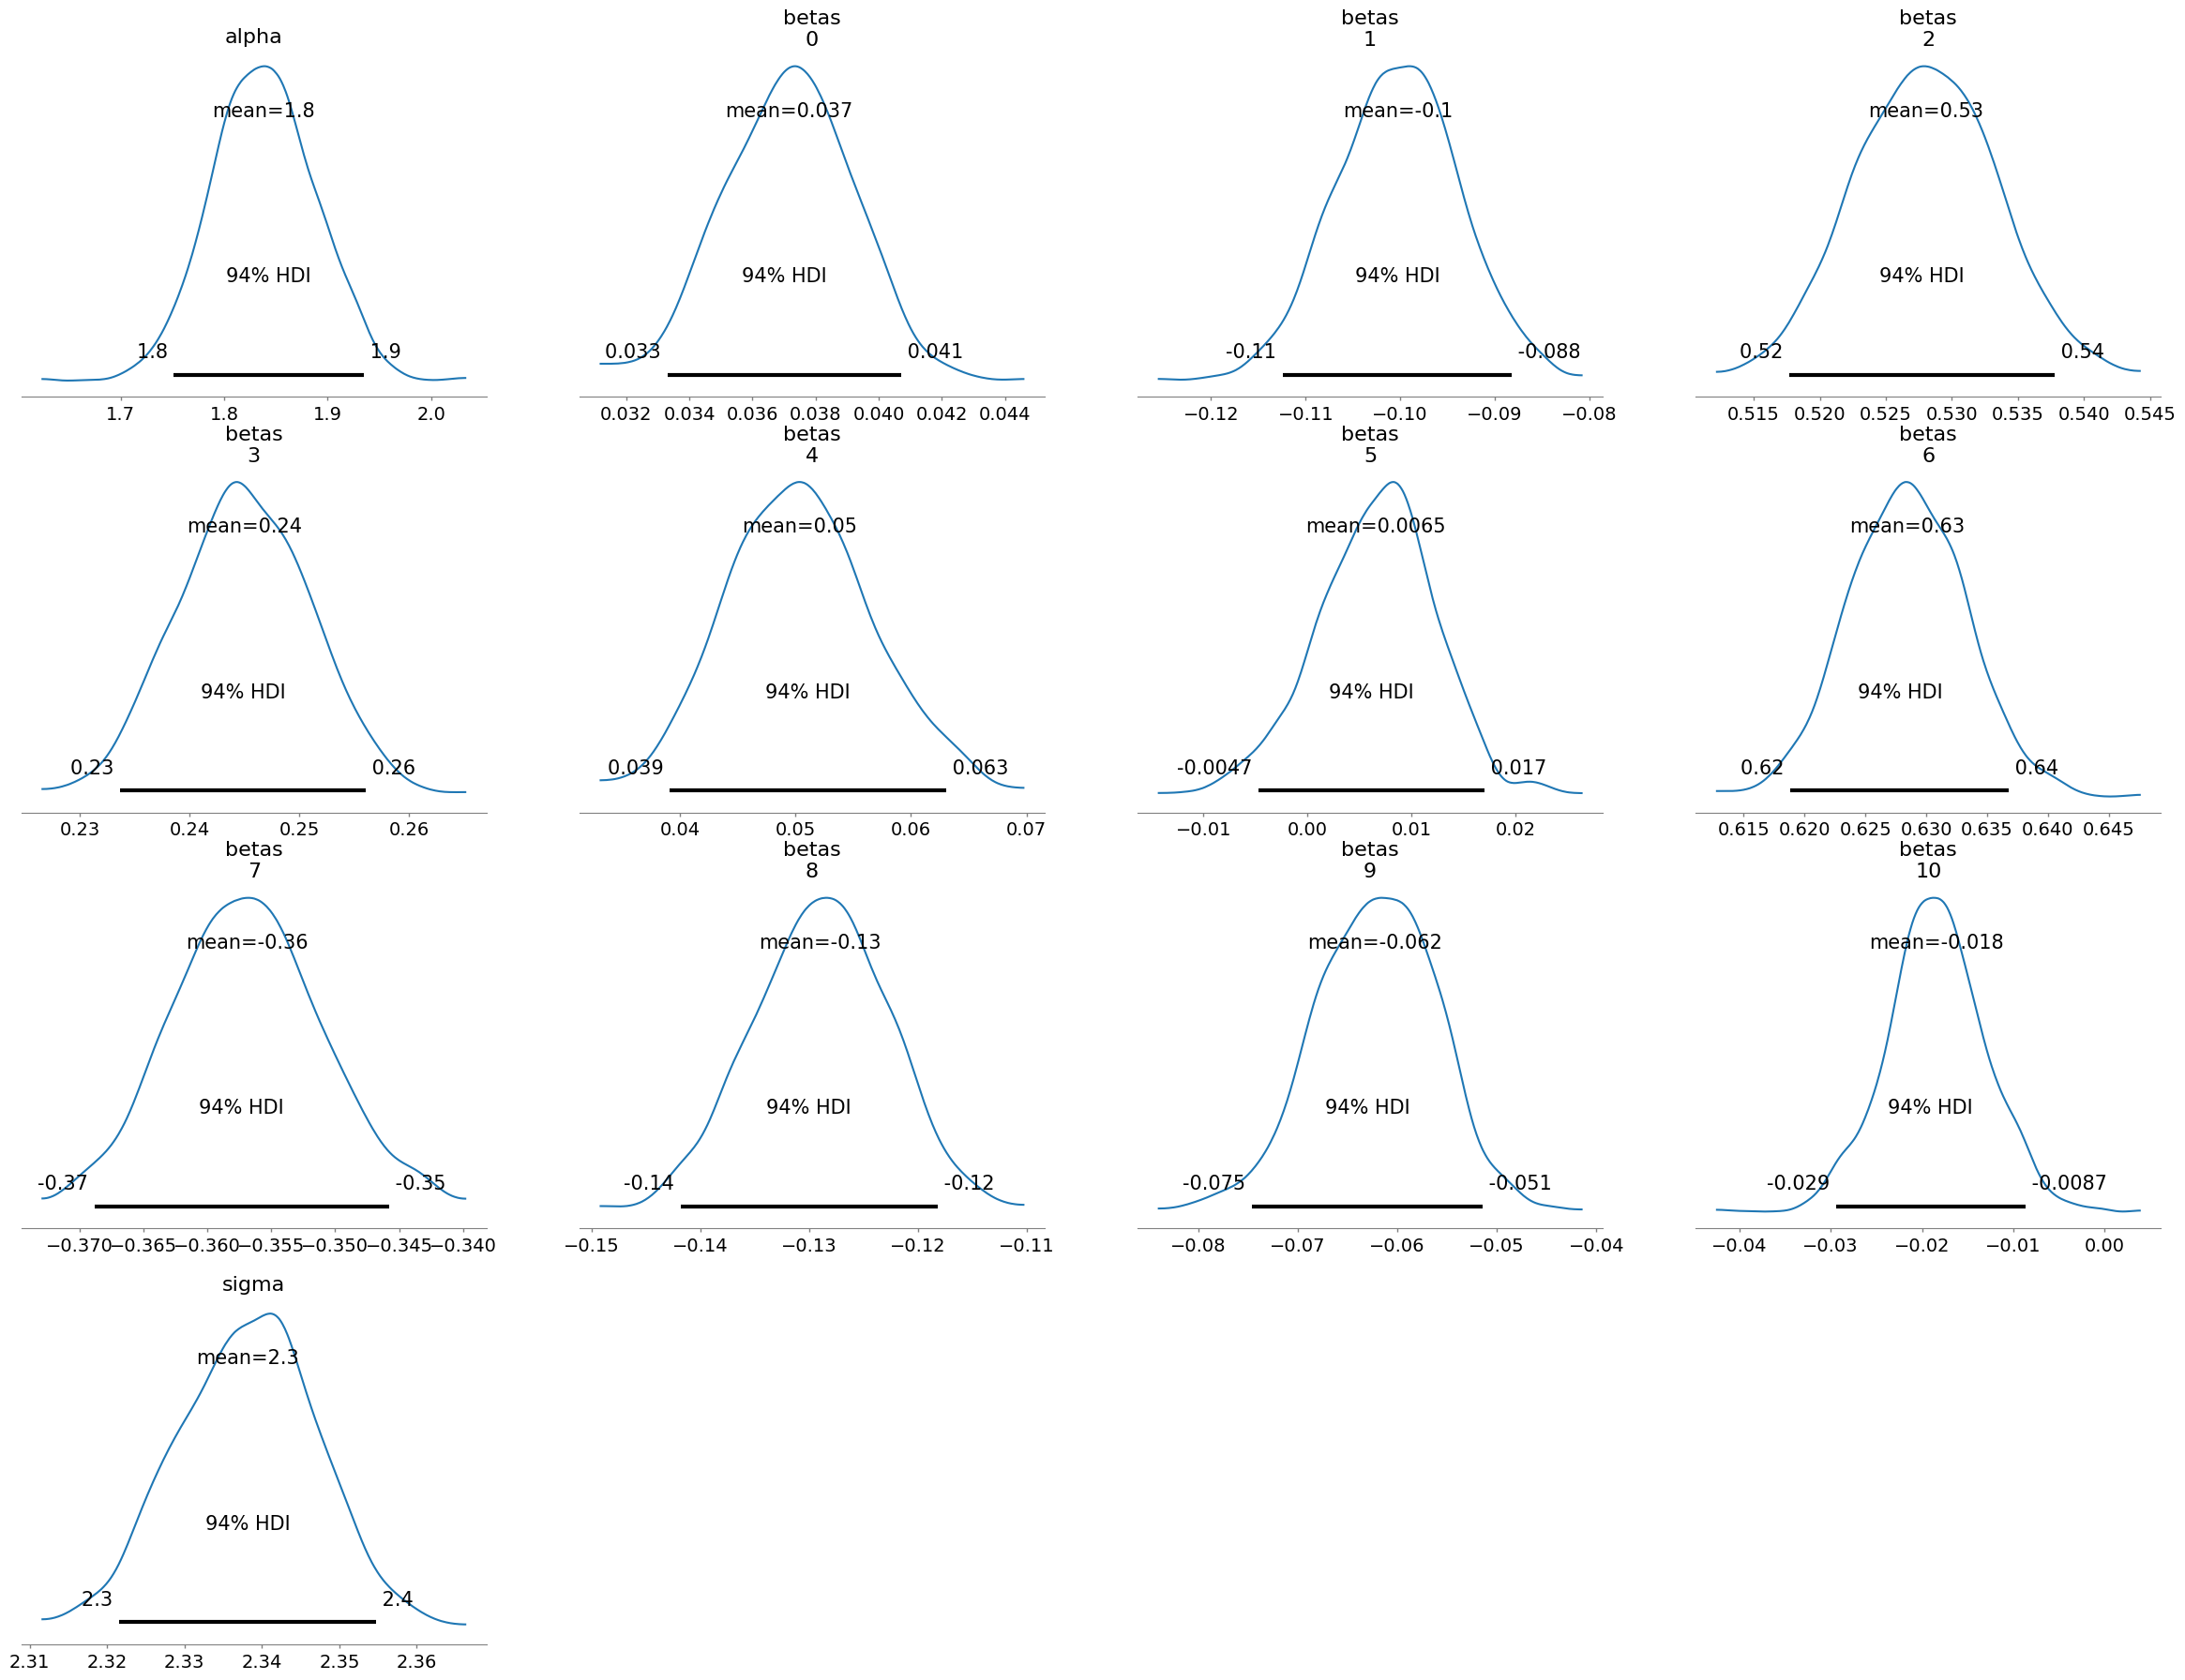

In [71]:
# Perform inference using the model
with model:
    # Sample from the posterior
    posterior_samples = pm.sample(draws=500, tune=500, return_inferencedata=True)

# Display the results
az.plot_posterior(posterior_samples)


Sampling: [Y_obs]


/Users/alexanderkell/anaconda3/envs/allye/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

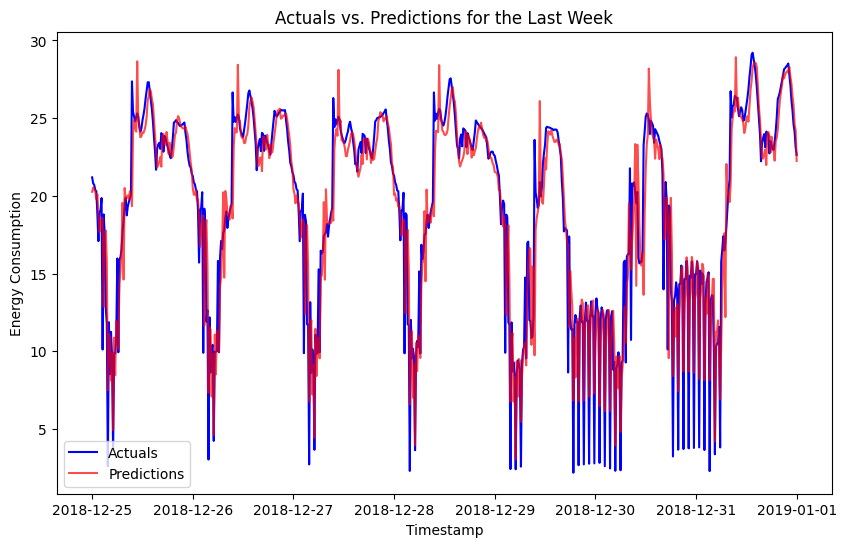

In [72]:
last_week_df = filtered_df[filtered_df['timestamp'] >= filtered_df['timestamp'].max() - pd.Timedelta(days=7)]

import arviz as az

# Generate posterior predictive samples for the filtered last week data
with model:
    posterior_pred_last_week = pm.sample_posterior_predictive(trace, var_names=['Y_obs'])

# Extract predictive means
predictions_last_week = az.summary(posterior_pred_last_week.posterior_predictive, kind="stats")["mean"].values
predictions_last_week = predictions_last_week[-673:]

# Extract actual values for the last week
actuals_last_week = last_week_df[target].values


# Ensure the timestamps and predictions lengths match
if len(predictions_last_week) != len(actuals_last_week):
    raise ValueError("Mismatch in the length of actuals and predictions.")

# Plot actuals vs. predictions for the last week
plt.figure(figsize=(10, 6))
plt.plot(last_week_df['timestamp'], actuals_last_week, label='Actuals', color='blue')
plt.plot(last_week_df['timestamp'], predictions_last_week, label='Predictions', color='red', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Actuals vs. Predictions for the Last Week')
plt.legend()
plt.show()

Sampling: [Y_obs]


/Users/alexanderkell/anaconda3/envs/allye/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

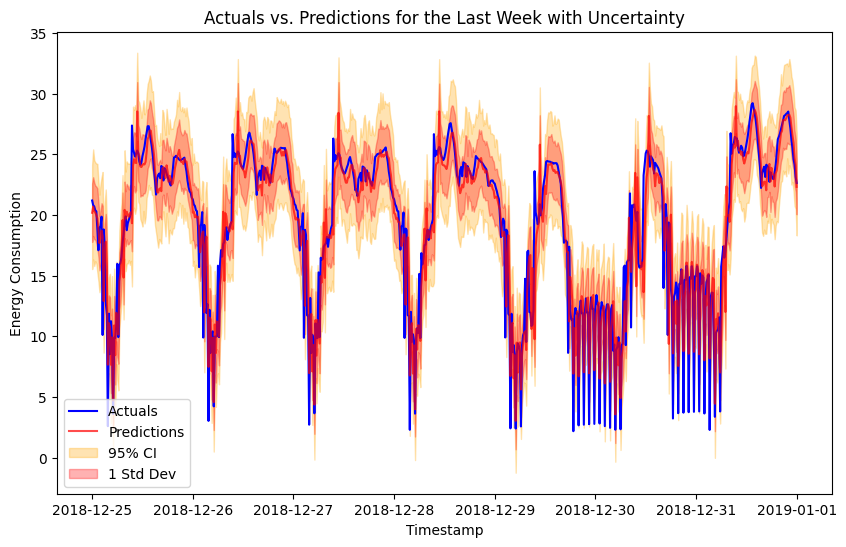

In [80]:
last_week_df = filtered_df[filtered_df['timestamp'] >= filtered_df['timestamp'].max() - pd.Timedelta(days=7)]

import arviz as az

# Generate posterior predictive samples for the filtered last week data
with model:
    posterior_pred_last_week = pm.sample_posterior_predictive(trace, var_names=['Y_obs'])

# Extract predictive statistics including mean and hdi (High Density Interval)
predictive_stats = az.summary(posterior_pred_last_week.posterior_predictive, kind="stats")
predictions_last_week = predictive_stats["mean"].values[-673:]
lower_bound = predictive_stats["hdi_3%"].values[-673:]
upper_bound = predictive_stats["hdi_97%"].values[-673:]

std_dev = predictive_stats["sd"].values[-673:]

# Extract actual values for the last week
actuals_last_week = last_week_df[target].values

# Ensure the timestamps and predictions lengths match
if len(predictions_last_week) != len(actuals_last_week):
    raise ValueError("Mismatch in the length of actuals and predictions.")

# Plot actuals vs. predictions for the last week with uncertainty
plt.figure(figsize=(10, 6))
plt.plot(last_week_df['timestamp'], actuals_last_week, label='Actuals', color='blue')
plt.plot(last_week_df['timestamp'], predictions_last_week, label='Predictions', color='red', alpha=0.7)
plt.fill_between(last_week_df['timestamp'], lower_bound, upper_bound, color='orange', alpha=0.3, label='95% CI')
plt.fill_between(last_week_df['timestamp'], predictions_last_week - std_dev, predictions_last_week + std_dev, color='red', alpha=0.3, label='1 Std Dev')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Actuals vs. Predictions for the Last Week with Uncertainty')
plt.legend()
plt.show()

In [75]:
predictive_stats

,mean,sd,hdi_3%,hdi_97%
Y_obs[0],18.332,2.403,13.479,22.640
Y_obs[1],12.250,2.306,8.065,16.558
Y_obs[2],17.475,2.235,13.219,21.622
Y_obs[3],19.934,2.265,16.065,24.468
Y_obs[4],14.215,2.306,9.857,18.070
...,...,...,...,...
Y_obs[35026],26.555,2.597,22.290,31.650
Y_obs[35027],25.700,2.309,21.047,29.666
Y_obs[35028],24.855,2.375,20.248,29.188
Y_obs[35029],24.069,2.358,19.344,27.974
